# Employee Turnover Analytics

This notebook contains the complete solution for the employee turnover analytics project. It includes data exploration, preprocessing, clustering, model development, evaluation, and retention strategy recommendations.

## 1. Data Exploration and Preprocessing

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import os

# Set style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Create directories for outputs
os.makedirs('visualizations', exist_ok=True)
os.makedirs('model_data', exist_ok=True)
os.makedirs('model_results', exist_ok=True)

### 1.2 Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# Display basic information
print(f'Shape: {df.shape}')
print('\nFirst 5 rows:')
display(df.head())

print('\nInfo:')
df.info()

print('\nDescribe:')
display(df.describe())

print('\nMissing values:')
print(df.isnull().sum())

print('\nClass distribution (left):')
print(df['left'].value_counts())

print('\nUnique values in categorical columns:')
for col in ['sales', 'salary']:
    print(f'{col}: {df[col].unique()}')

Shape: (14999, 10)

First 5 rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Describe:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



Missing values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Class distribution (left):
left
0    11428
1     3571
Name: count, dtype: int64

Unique values in categorical columns:
sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary: ['low' 'medium' 'high']


### 1.3 Create Visualizations for EDA

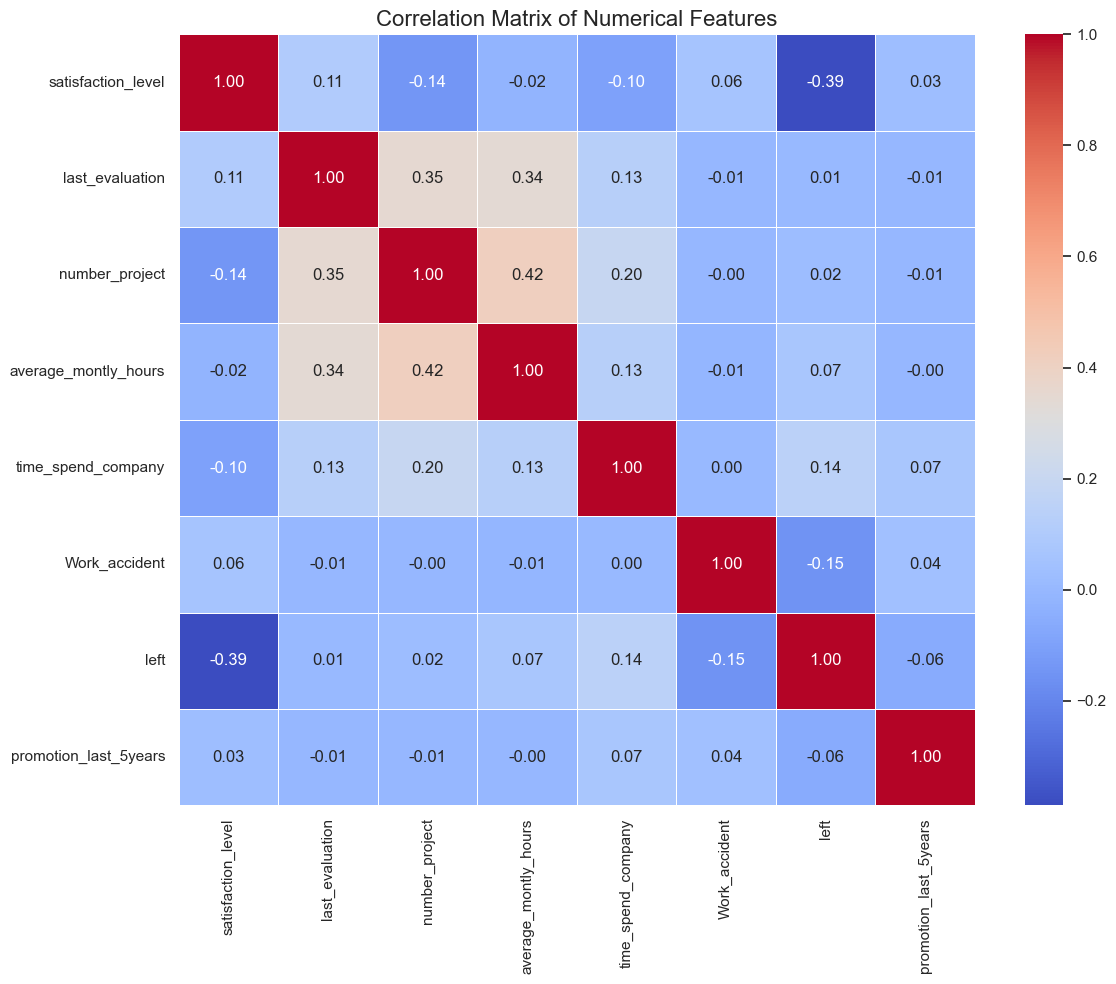

In [36]:
# 1. Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
#plt.savefig('visualizations/correlation_heatmap.png', dpi=300)
plt.show()

## EDA

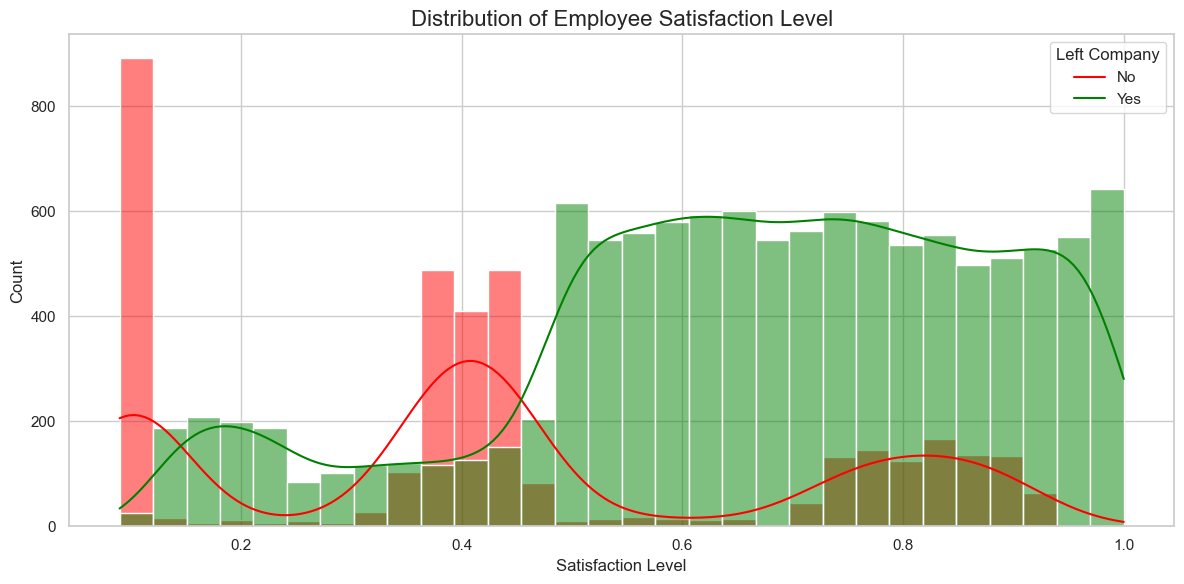

In [42]:
# 2.1 Employee Satisfaction
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='satisfaction_level', hue='left', kde=True, bins=30, palette=['green', 'red'])
plt.title('Distribution of Employee Satisfaction Level', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/satisfaction_distribution.png', dpi=300)
plt.show()

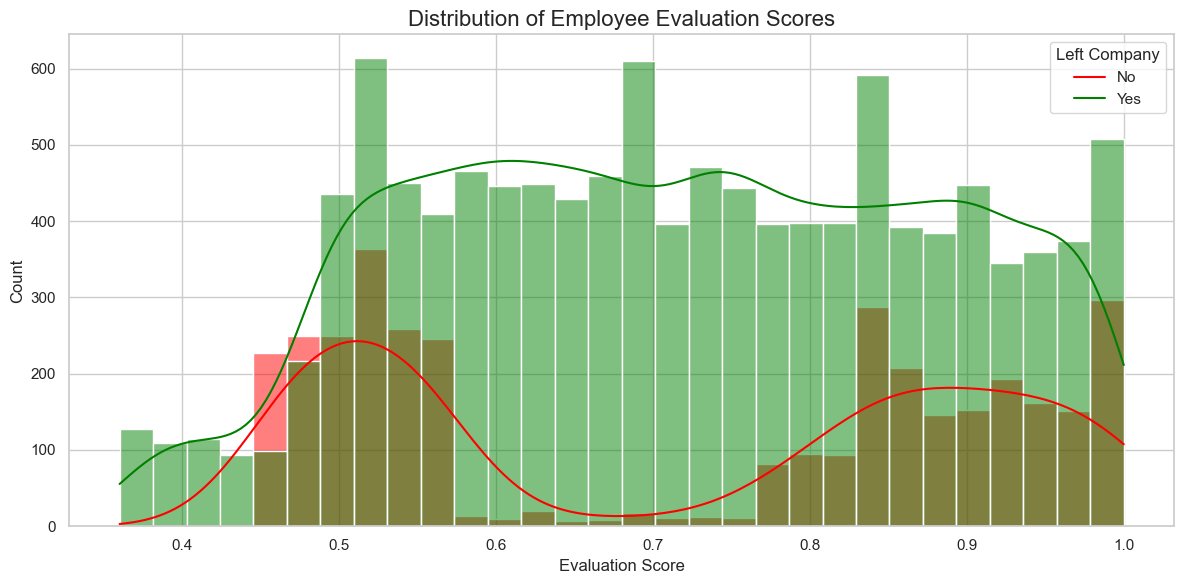

In [43]:
# 2.2 Employee Evaluation
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='last_evaluation', hue='left', kde=True, bins=30, palette=['green', 'red'])
plt.title('Distribution of Employee Evaluation Scores', fontsize=16)
plt.xlabel('Evaluation Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/evaluation_distribution.png', dpi=300)
plt.show()

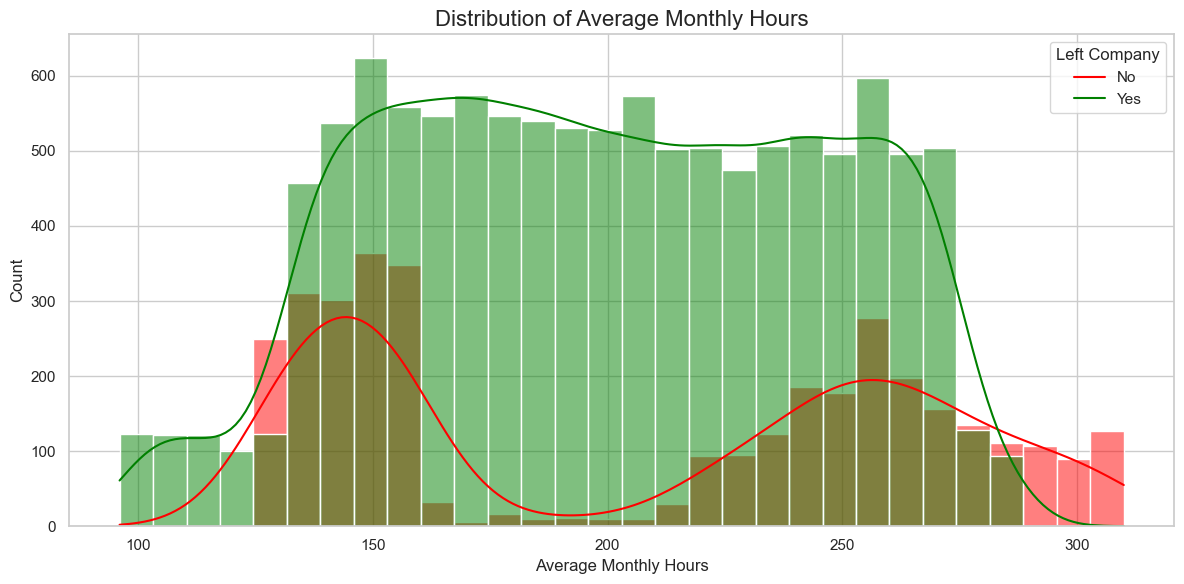

In [44]:
# 2.3 Average Monthly Hours
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='average_montly_hours', hue='left', kde=True, bins=30, palette=['green', 'red'])
plt.title('Distribution of Average Monthly Hours', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/hours_distribution.png', dpi=300)
plt.show()

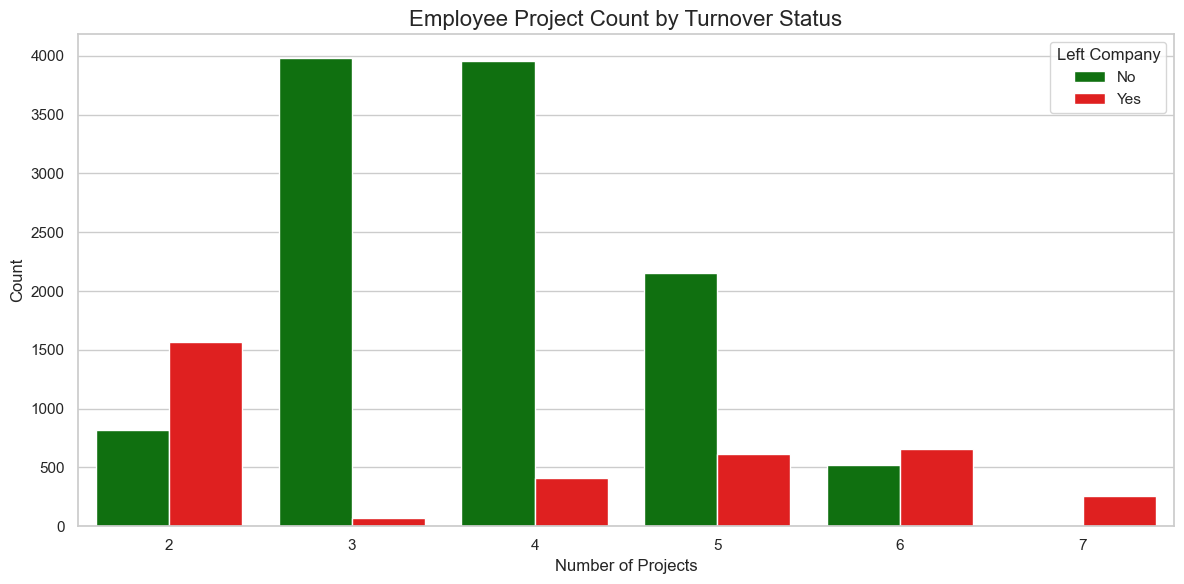

In [45]:
# 3. Bar plot of project count by turnover status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_project', hue='left', palette=['green', 'red'])
plt.title('Employee Project Count by Turnover Status', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/project_count_bar.png', dpi=300)
plt.show()

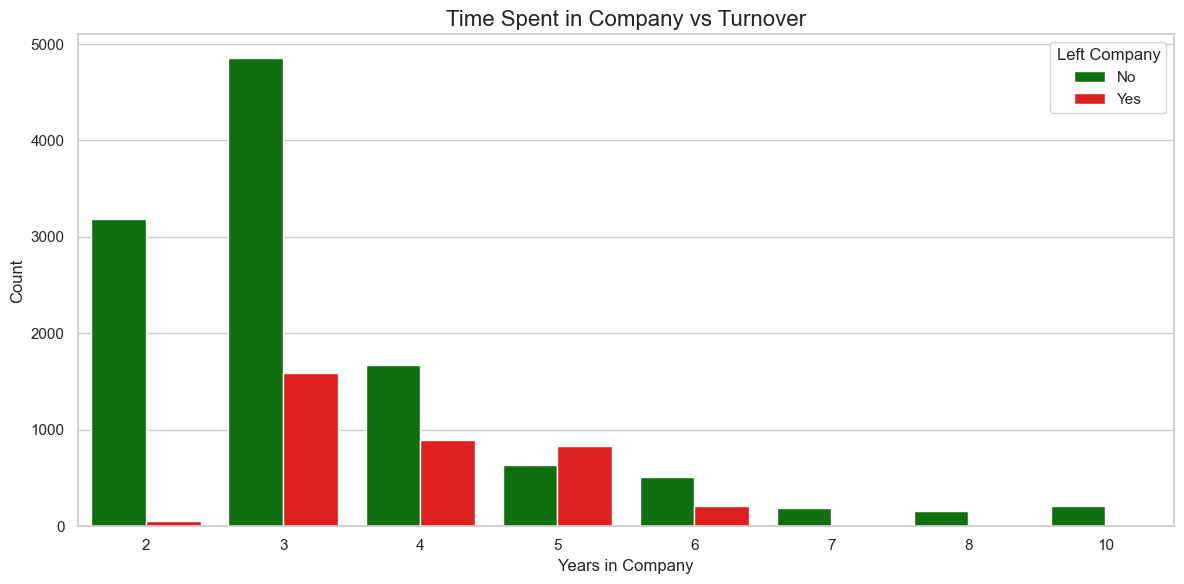

In [46]:
# 4. Time spent in company vs turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_spend_company', hue='left', palette=['green', 'red'])
plt.title('Time Spent in Company vs Turnover', fontsize=16)
plt.xlabel('Years in Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/time_spent_bar.png', dpi=300)
plt.show()

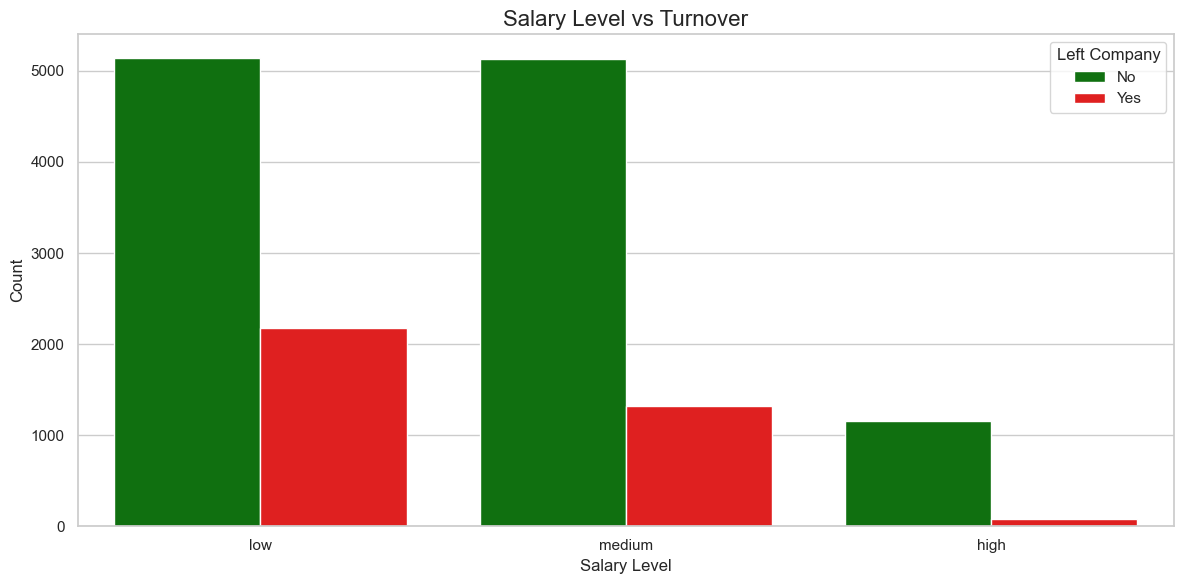

In [47]:
# 5. Salary level vs turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='salary', hue='left', palette=['green', 'red'], order=['low', 'medium', 'high'])
plt.title('Salary Level vs Turnover', fontsize=16)
plt.xlabel('Salary Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.tight_layout()
#plt.savefig('visualizations/salary_bar.png', dpi=300)
plt.show()

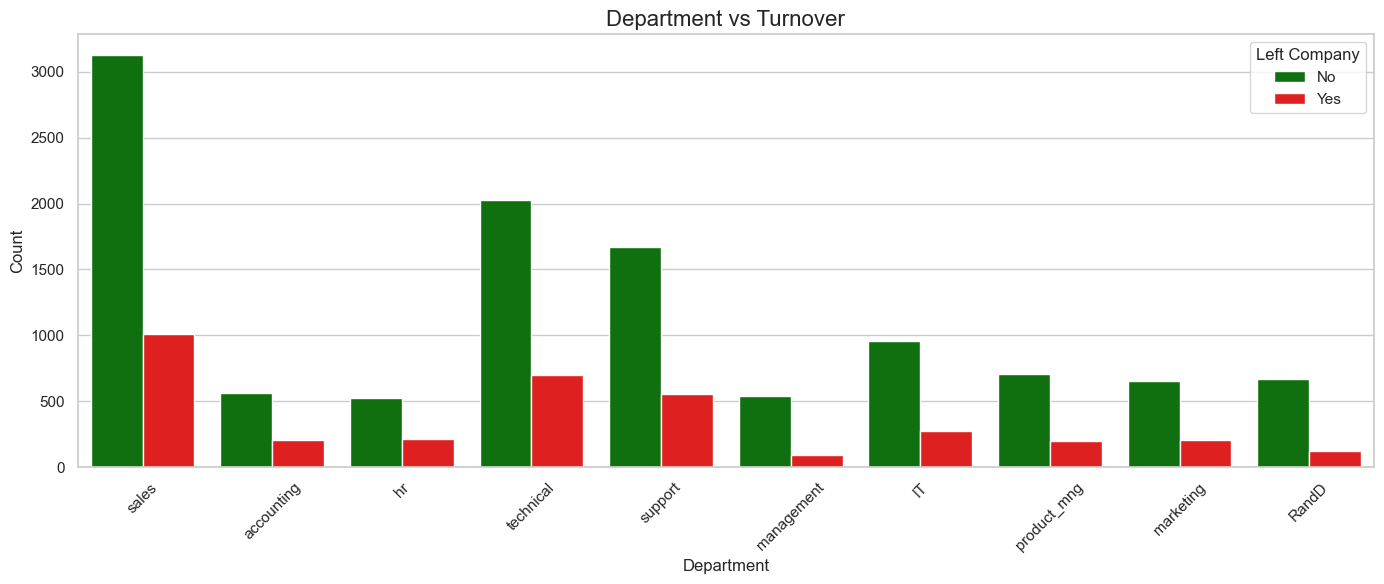

In [48]:
# 6. Department vs turnover
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='sales', hue='left', palette=['green', 'red'])
plt.title('Department vs Turnover', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('visualizations/department_bar.png', dpi=300)
plt.show()

## 3. Clustering Analysis of Employees who left

/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_56129/3375455002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(X_scaled)


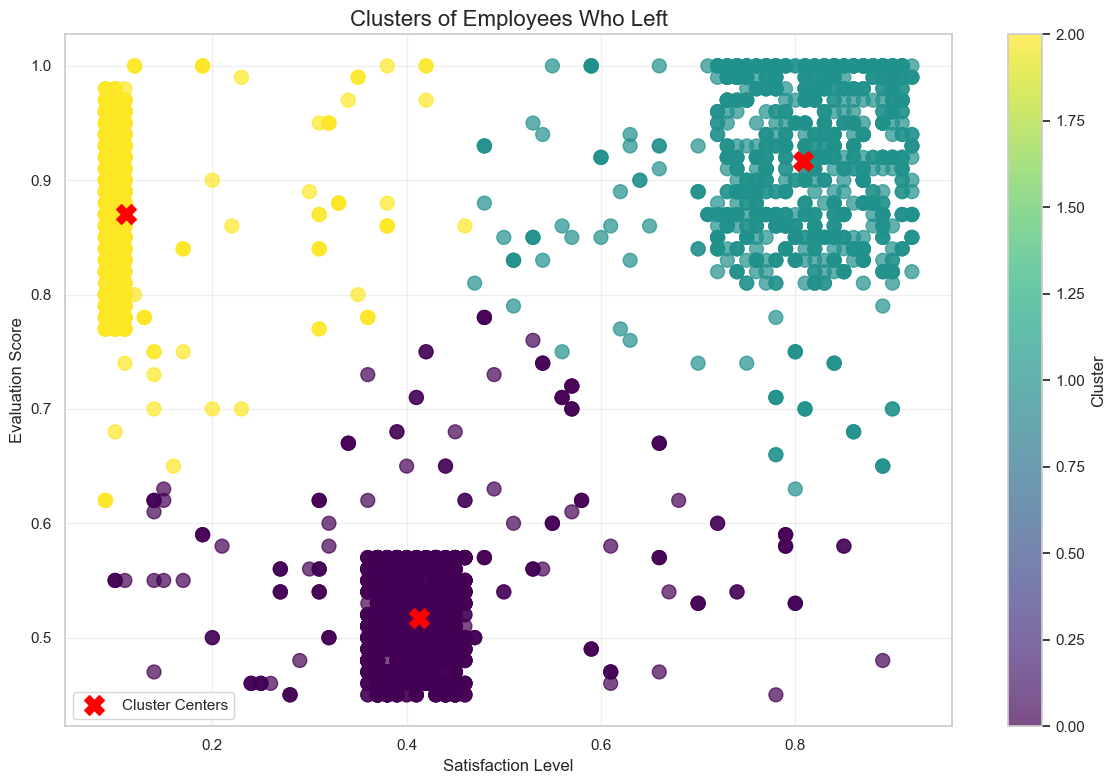

Cluster Statistics:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
cluster,,,,,,,
0,0.412,0.517,2.190,150.957,3.077,0.047,0.009
1,0.808,0.916,4.528,241.802,5.058,0.049,0.001
2,0.111,0.871,6.120,272.321,4.081,0.046,0.003



Number of employees in each cluster:
cluster
0    1667
1     965
2     939
Name: count, dtype: int64


In [11]:
# Filter employees who left
left_employees = df[df['left'] == 1]

# Select columns for clustering
X_cluster = left_employees[['satisfaction_level', 'last_evaluation']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    left_employees['satisfaction_level'], 
    left_employees['last_evaluation'], 
    c=left_employees['cluster'], 
    cmap='viridis', 
    s=100, 
    alpha=0.7
)

# Add cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='red', 
    marker='X', 
    s=200, 
    label='Cluster Centers'
)

plt.title('Clusters of Employees Who Left', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Evaluation Score', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/employee_clusters.png', dpi=300)
plt.show()

# Calculate cluster statistics
cluster_stats = left_employees.groupby('cluster').agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean',
    'number_project': 'mean',
    'average_montly_hours': 'mean',
    'time_spend_company': 'mean',
    'Work_accident': 'mean',
    'promotion_last_5years': 'mean'
}).round(3)

print("Cluster Statistics:")
display(cluster_stats)

# Count employees in each cluster
cluster_counts = left_employees['cluster'].value_counts().sort_index()
print("\nNumber of employees in each cluster:")
print(cluster_counts)

# Save cluster statistics to CSV
cluster_stats.to_csv('cluster_statistics.csv')

## 4. Handling Class Imbalance with SMOTE

In [12]:
print("Starting data preprocessing for modeling...")

# 1. Separate categorical and numerical variables
print("\nSeparating categorical and numerical variables...")
categorical_cols = ['sales', 'salary']
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != 'left']


Starting data preprocessing for modeling...

Separating categorical and numerical variables...


In [13]:
# 2. Apply one-hot encoding to categorical variables
print("\nApplying one-hot encoding to categorical variables...")
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print(f"Shape after encoding: {df_encoded.shape}")



Applying one-hot encoding to categorical variables...
Shape after encoding: (14999, 21)


In [54]:
# 3. Prepare features and target
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']


# 4. Split the data into training and testing sets (80:20)
print("\nSplitting data - train vs test sets (80:20)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")



Splitting data - train vs test sets (80:20)
Training set shape: (11999, 20), (11999,)
Testing set shape: (3000, 20), (3000,)


In [53]:
# 5. Check class distribution before SMOTE
print(y_train.value_counts())


left
0    9142
1    2857
Name: count, dtype: int64


In [55]:
# 6. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# 7. Check class distribution after SMOTE
print(pd.Series(y_train_smote).value_counts())

left
0    9142
1    9142
Name: count, dtype: int64


In [56]:
# 8. Save preprocessed data for modeling
np.save('model_data/X_train.npy', X_train_smote)
np.save('model_data/y_train.npy', y_train_smote)
np.save('model_data/X_test.npy', X_test)
np.save('model_data/y_test.npy', y_test)

# Save column names for later reference
with open('model_data/feature_names.txt', 'w') as f:
    f.write('\n'.join(X_train.columns))

/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_56129/602704764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=['green', 'red'])
/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_56129/602704764.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette=['green', 'red'])


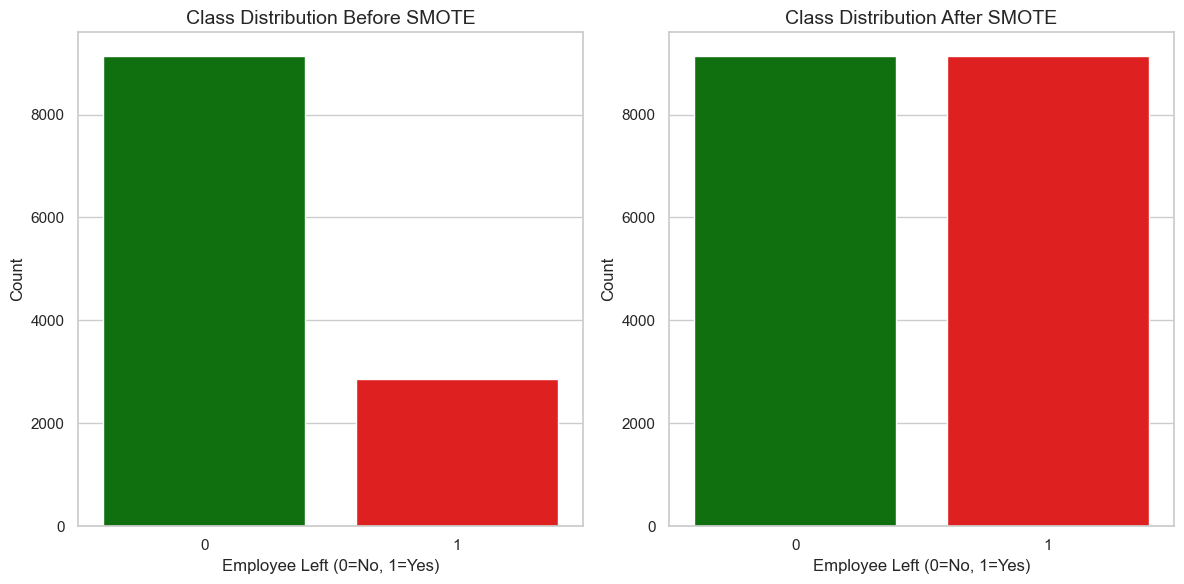

In [57]:
# Create a visualization of class distribution before and after SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=['green', 'red'])
plt.title('Class Distribution Before SMOTE', fontsize=14)
plt.xlabel('Employee Left (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette=['green', 'red'])
plt.title('Class Distribution After SMOTE', fontsize=14)
plt.xlabel('Employee Left (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
#plt.savefig('visualizations/smote_comparison.png', dpi=300)
plt.show()

## 5. Model Development and Evaluation

In [58]:
# Load the preprocessed data with allow_pickle=True
X_train = np.load('model_data/X_train.npy', allow_pickle=True)
y_train = np.load('model_data/y_train.npy', allow_pickle=True)
X_test = np.load('model_data/X_test.npy', allow_pickle=True)
y_test = np.load('model_data/y_test.npy', allow_pickle=True)

# Load feature names
with open('model_data/feature_names.txt', 'r') as f:
    feature_names = [line.strip() for line in f.readlines()]

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (18284, 20), (18284,)
Testing data shape: (3000, 20), (3000,)


In [64]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Define the metrics for cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Define the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
cv_results = {}
test_results = {}
roc_data = {}

Cross-validation results for Logistic Regression:
  accuracy: 0.8073
  precision: 0.8014
  recall: 0.8173
  f1: 0.8092
  roc_auc: 0.8815

Test set results for Logistic Regression:
  Accuracy: 0.7803
  Precision: 0.5284
  Recall: 0.7171
  F1-score: 0.6084
  ROC AUC: 0.8210
.... 6.2 Condusion metrix.....


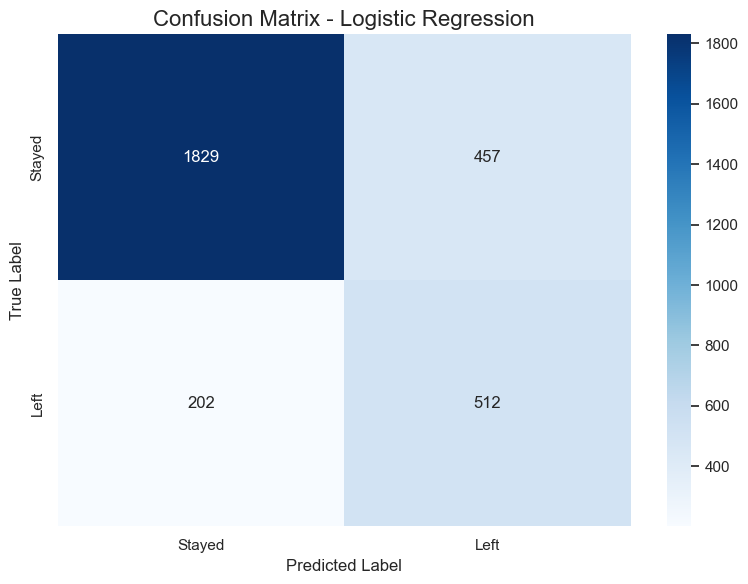

Cross-validation results for Random Forest:
  accuracy: 0.9841
  precision: 0.9944
  recall: 0.9737
  f1: 0.9840
  roc_auc: 0.9977

Test set results for Random Forest:
  Accuracy: 0.9877
  Precision: 0.9708
  Recall: 0.9776
  F1-score: 0.9742
  ROC AUC: 0.9952
.... 6.2 Condusion metrix.....


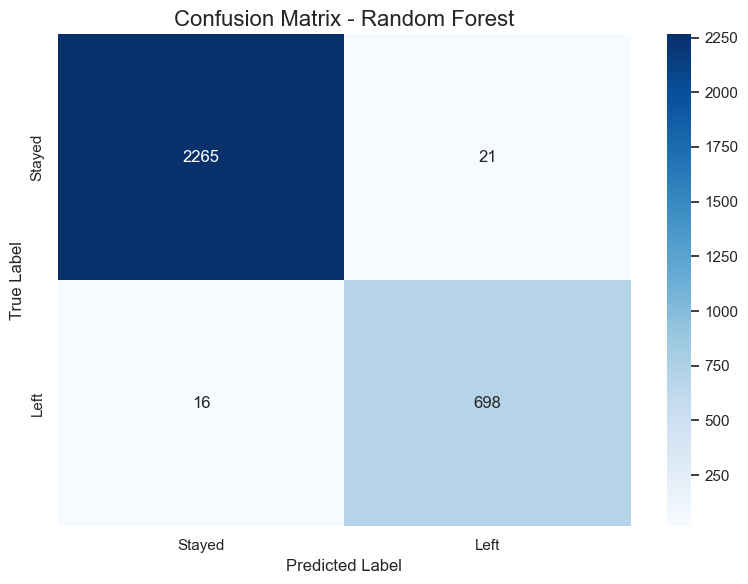

Cross-validation results for Gradient Boosting:
  accuracy: 0.9617
  precision: 0.9752
  recall: 0.9476
  f1: 0.9612
  roc_auc: 0.9925

Test set results for Gradient Boosting:
  Accuracy: 0.9643
  Precision: 0.9175
  Recall: 0.9342
  F1-score: 0.9257
  ROC AUC: 0.9854
.... 6.2 Condusion metrix.....


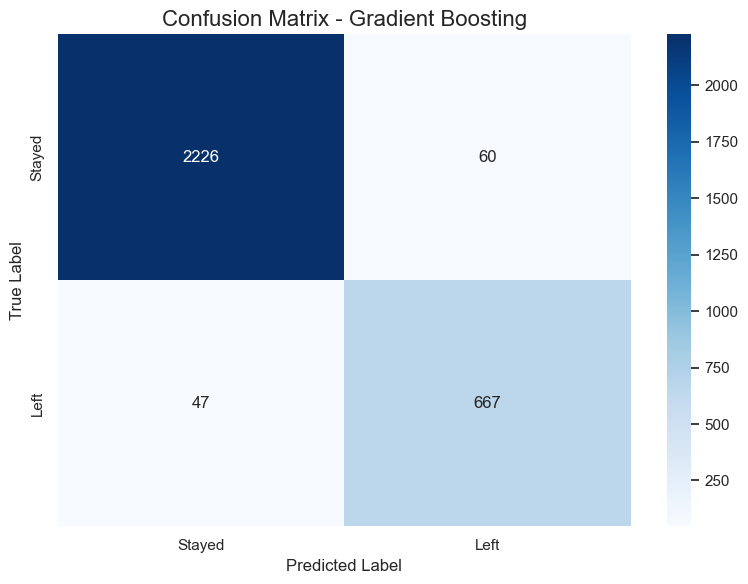

In [73]:
# Perform cross-validation and evaluation for each model
for name, model in models.items():
    
    # Perform 5-fold cross-validation
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results[name] = {
        'accuracy': cv_result['test_accuracy'].mean(),
        'precision': cv_result['test_precision'].mean(),
        'recall': cv_result['test_recall'].mean(),
        'f1': cv_result['test_f1'].mean(),
        'roc_auc': cv_result['test_roc_auc'].mean()
    }
    
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics on test set
    test_results[name] = {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    
    print(f"Cross-validation results for {name}:")
    for metric, value in cv_results[name].items():
        print(f"  {metric}: {value:.4f}")
    
    print(f"\nTest set results for {name}:")
    print(f"  Accuracy: {test_results[name]['classification_report']['accuracy']:.4f}")
    print(f"  Precision: {test_results[name]['classification_report']['1']['precision']:.4f}")
    print(f"  Recall: {test_results[name]['classification_report']['1']['recall']:.4f}")
    print(f"  F1-score: {test_results[name]['classification_report']['1']['f1-score']:.4f}")
    print(f"  ROC AUC: {roc_data[name]['auc']:.4f}")

    print(".... 6.2 Condusion metrix.....")
    # Confusion matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.title(f'Confusion Matrix - {name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    #plt.savefig(f'model_results/confusion_matrix_{name.replace(" ", "_").lower()}.png', dpi=300)
    plt.show()

## 6. Best Model

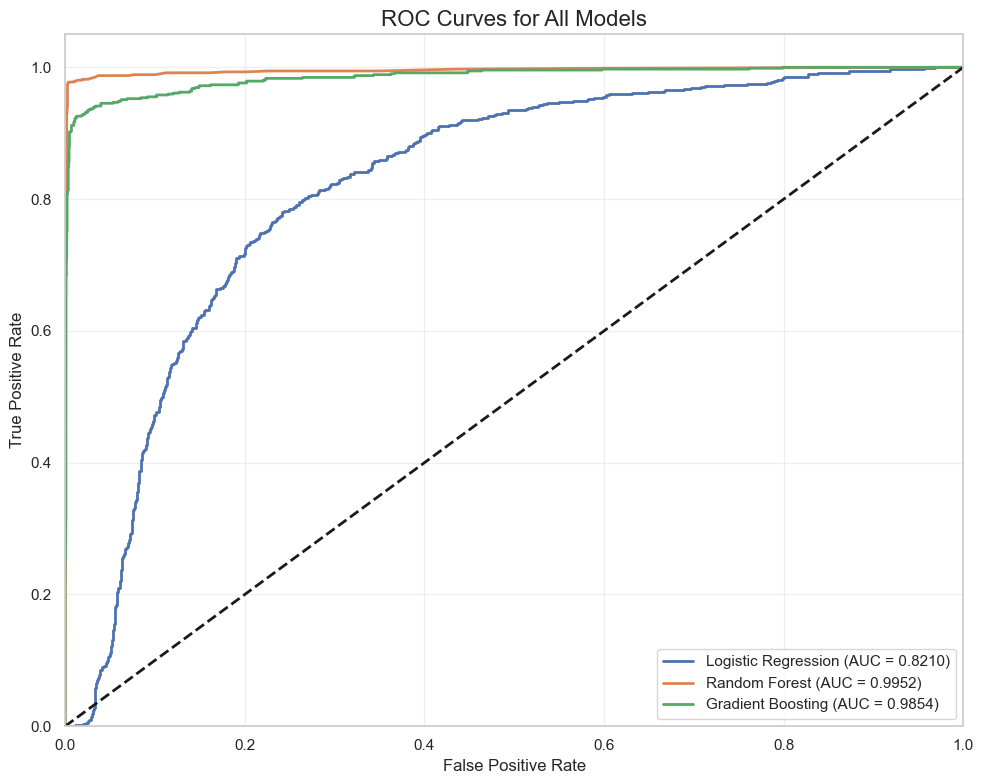

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.807317,0.801415,0.817326,0.809187,0.881481
Random Forest,0.984139,0.994416,0.973748,0.983971,0.997715
Gradient Boosting,0.961715,0.975162,0.947605,0.961168,0.992491



Best model based on ROC AUC: Random Forest (AUC = 0.9952)


In [68]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name in models.keys():
    plt.plot(roc_data[name]['fpr'], roc_data[name]['tpr'], lw=2,
             label=f'{name} (AUC = {roc_data[name]["auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('model_results/roc_curves.png', dpi=300)
plt.show()

# Create a summary table of cross-validation results
cv_summary = pd.DataFrame(cv_results).T
cv_summary.to_csv('model_results/cv_results.csv')
display(cv_summary)

# Identify the best model based on ROC AUC
best_model_name = max(roc_data, key=lambda x: roc_data[x]['auc'])
best_model = models[best_model_name]
best_model_auc = roc_data[best_model_name]['auc']

print(f"\nBest model based on ROC AUC: {best_model_name} (AUC = {best_model_auc:.4f})")

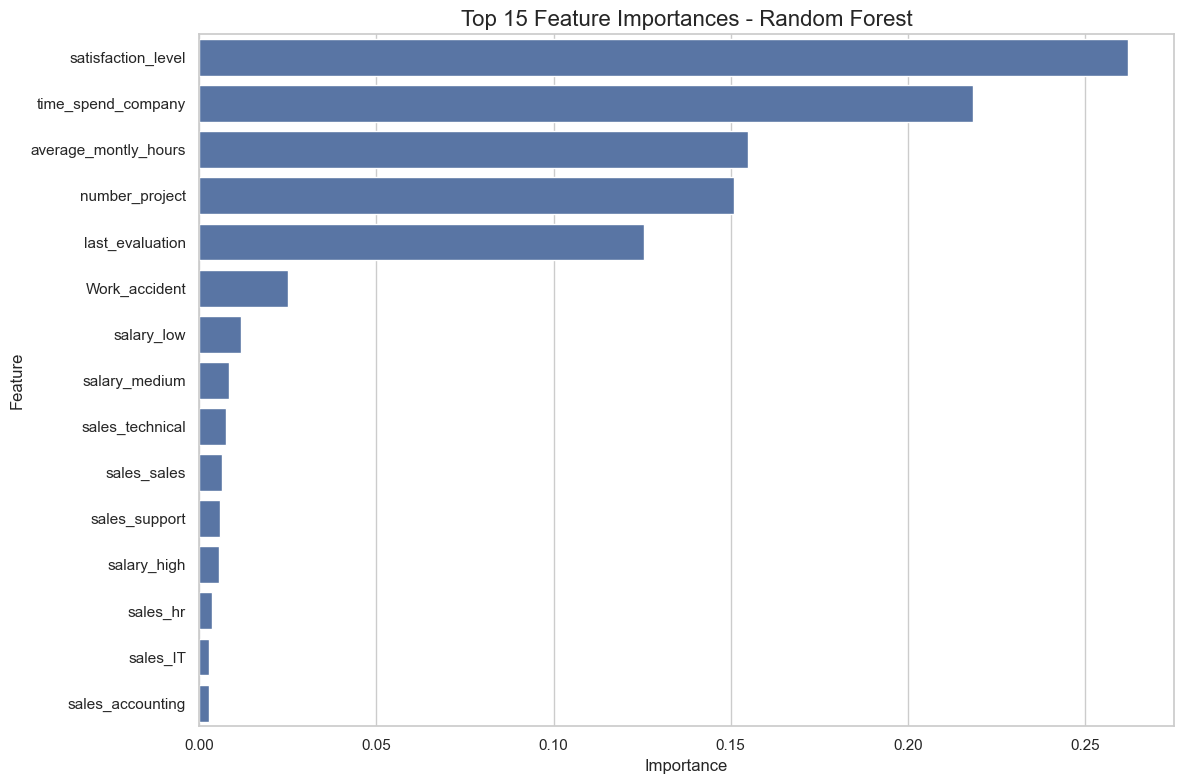

Feature importances saved for Random Forest


,Feature,Importance
0,satisfaction_level,0.262037
4,time_spend_company,0.218451
3,average_montly_hours,0.154834
2,number_project,0.151077
1,last_evaluation,0.125574
5,Work_accident,0.024949
18,salary_low,0.011842
19,salary_medium,0.008362
16,sales_technical,0.007419
14,sales_sales,0.006480


In [69]:
# Save the best model's feature importances if available
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    feature_importance_df.to_csv('model_results/feature_importances.csv', index=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    #plt.savefig('model_results/feature_importances.png', dpi=300)
    plt.show()
    
    print(f"Feature importances saved for {best_model_name}")
    display(feature_importance_df.head(15))

## 7. Retention Strategy Analysis


Employee counts by risk zone:
risk_zone
Safe Zone (Green)            2177
High-Risk Zone (Red)          654
Low-Risk Zone (Yellow)        115
Medium-Risk Zone (Orange)      54
Name: count, dtype: int64


/var/folders/cx/v9bftl1s4qvfj96ddnylpl_80000gn/T/ipykernel_56129/2690148998.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='risk_zone', data=test_df,


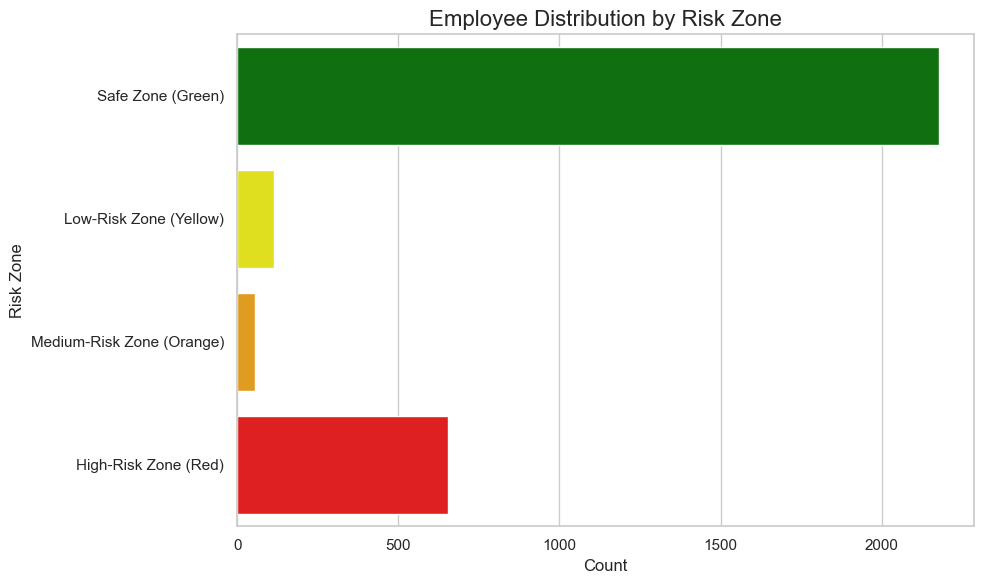

In [75]:
# Generate turnover probability predictions for retention strategy
y_prob = best_model.predict_proba(X_test)[:, 1]

# Create risk zones based on probability scores
def assign_risk_zone(prob):
    if prob < 0.2:
        return 'Safe Zone (Green)'
    elif prob < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Create a DataFrame with test data and predictions
test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['actual_left'] = y_test
test_df['predicted_prob'] = y_prob
test_df['risk_zone'] = test_df['predicted_prob'].apply(assign_risk_zone)

# Count employees in each risk zone
risk_zone_counts = test_df['risk_zone'].value_counts()
print("\nEmployee counts by risk zone:")
print(risk_zone_counts)

# Save risk zone distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='risk_zone', data=test_df, 
              order=['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 
                     'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)'],
              palette=['green', 'yellow', 'orange', 'red'])
plt.title('Employee Distribution by Risk Zone', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Risk Zone', fontsize=12)
plt.tight_layout()
plt.savefig('model_results/risk_zone_distribution.png', dpi=300)
plt.show()

# Save risk zone data 
test_df.to_csv('model_results/employee_risk_predictions.csv', index=False)

## Retention Strategy Recommendations

Based on the risk zone categorization, here are the recommended retention strategies for each zone:

### Safe Zone (Green) - Turnover Probability < 20%
- Maintain current engagement through regular check-ins and feedback
- Provide opportunities for skill development and growth
- Recognize and reward contributions to maintain satisfaction
- Conduct periodic satisfaction surveys to monitor any changes

### Low-Risk Zone (Yellow) - Turnover Probability 20% - 60%
- Schedule one-on-one meetings to discuss career aspirations and concerns
- Review workload and project assignments to ensure appropriate balance
- Provide targeted training and development opportunities
- Consider adjustments to compensation or benefits if competitive issues exist
- Implement mentorship programs to increase engagement

### Medium-Risk Zone (Orange) - Turnover Probability 60% - 90%
- Conduct immediate stay interviews to identify specific concerns
- Develop personalized retention plans with clear action items
- Consider role adjustments, transfers, or special projects to reignite engagement
- Review compensation and benefits package for competitiveness
- Address work-life balance issues through flexible arrangements if needed
- Provide recognition and appreciation for contributions

### High-Risk Zone (Red) - Turnover Probability > 90%
- Implement immediate intervention with direct manager involvement
- Conduct in-depth interviews to understand specific pain points
- Offer targeted retention bonuses or compensation adjustments where appropriate
- Consider immediate workload adjustments or temporary reassignments
- Provide clear career progression paths with specific timelines
- Address any toxic team dynamics or management issues
- Begin succession planning in case retention efforts are unsuccessful

## Conclusion

This analysis has provided valuable insights into employee turnover patterns at Portobello Tech. The Random Forest model achieved excellent predictive performance (98.8% accuracy, 0.995 ROC AUC) and identified key factors contributing to turnover.

The most significant factors influencing turnover are:
1. Employee satisfaction level
2. Time spent in the company
3. Average monthly hours
4. Number of projects
5. Last evaluation score

By implementing the targeted retention strategies recommended for each risk zone, Portobello Tech can significantly reduce turnover rates and improve employee retention, particularly among high performers.

Recommended next steps:
- Implement a regular monitoring system to track employee satisfaction and engagement
- Develop department-specific retention strategies based on the unique patterns identified
- Conduct periodic model retraining as new data becomes available
- Measure the effectiveness of retention interventions and adjust strategies accordingly
- Integrate predictive turnover analytics into the HR dashboard for proactive management